In [22]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import os   
import random
import math
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from faker import Faker

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# Cars

In [23]:
car = pd.read_excel('\\Users\\Andrea\\EXCEL\\EXCEL FOR BEGINNERS.xlsx', sheet_name = 'car inventory')
car.head()

,Car ID,Make,Make (Full Name),Model,Model (Full Name),Manufacture Year,Age,Miles,Miles / Year,Color,Driver,Warantee Miles,Covered?,New Car ID
0,TY96CAM020,TY,Toyota,CAM,Camrey,96.0,27.0,114660.6,4169.476364,Green,Chan,100000.0,NO,TY96CAMGRE020
1,TY98CAM021,TY,Toyota,CAM,Camrey,98.0,25.0,93382.6,3662.062745,Black,Swartz,100000.0,YES,TY98CAMBLA021
2,TY00CAM022,TY,Toyota,CAM,Camrey,0.0,23.0,85928.0,3656.510638,Green,Ewenty,100000.0,YES,TY00CAMGRE022
3,GM98SLV018,GM,General Motor,SLV,Silverado,98.0,25.0,83162.7,3261.282353,Black,Santos,100000.0,YES,GM98SLVBLA018
4,HO99CIV030,HO,Honda,CIV,Civic,99.0,24.0,82374.0,3362.204082,White,Rodriguez,75000.0,NO,HO99CIVWHI030


## Data structure

In [24]:
car.shape

(66, 14)

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car ID             52 non-null     object 
 1   Make               59 non-null     object 
 2   Make (Full Name)   58 non-null     object 
 3   Model              63 non-null     object 
 4   Model (Full Name)  63 non-null     object 
 5   Manufacture Year   52 non-null     float64
 6   Age                52 non-null     float64
 7   Miles              52 non-null     float64
 8   Miles / Year       53 non-null     object 
 9   Color              52 non-null     object 
 10  Driver             52 non-null     object 
 11  Warantee Miles     52 non-null     float64
 12  Covered?           52 non-null     object 
 13  New Car ID         52 non-null     object 
dtypes: float64(4), object(10)
memory usage: 7.3+ KB


In [26]:
car.describe()

,Manufacture Year,Age,Miles,Warantee Miles
count,52.000000,52.000000,52.000000,52.000000
mean,16.942308,15.673077,44922.832692,84615.384615
std,27.018812,5.174300,25198.296539,16534.164091
min,0.000000,9.000000,3708.100000,50000.000000
25%,6.000000,11.000000,24028.150000,75000.000000
50%,10.000000,15.000000,38942.800000,75000.000000
75%,13.000000,19.250000,65363.775000,100000.000000
max,99.000000,27.000000,114660.600000,100000.000000


In [27]:
car.dtypes

Car ID                object
Make                  object
Make (Full Name)      object
Model                 object
Model (Full Name)     object
Manufacture Year     float64
Age                  float64
Miles                float64
Miles / Year          object
Color                 object
Driver                object
Warantee Miles       float64
Covered?              object
New Car ID            object
dtype: object

In [28]:
car.median()

C:\Users\Andrea\AppData\Local\Temp\ipykernel_11736\961299306.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.median()


Manufacture Year       10.0
Age                    15.0
Miles               38942.8
Warantee Miles      75000.0
dtype: float64

In [29]:
car.mode()

C:\Users\Andrea\AppData\Local\Temp\ipykernel_11736\685480997.py:1: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  car.mode()


,Car ID,Make,Make (Full Name),Model,Model (Full Name),Manufacture Year,Age,Miles,Miles / Year,Color,Driver,Warantee Miles,Covered?,New Car ID
0,CR00CAR046,FD,Ford,FCS,Focus,13.0,10.0,3708.1,4169.476364,Black,Smith,100000.0,YES,CR00CARBLA046
1,CR04CAR047,NaN,NaN,NaN,NaN,NaN,NaN,13682.9,3662.062745,NaN,NaN,NaN,NaN,CR04CARRED048
2,CR04CAR048,NaN,NaN,NaN,NaN,NaN,NaN,13867.6,3656.510638,NaN,NaN,NaN,NaN,CR04CARWHI047
3,CR04PTC042,NaN,NaN,NaN,NaN,NaN,NaN,14289.6,3261.282353,NaN,NaN,NaN,NaN,CR04PTCBLU042
4,CR07PTC043,NaN,NaN,NaN,NaN,NaN,NaN,17556.3,3362.204082,NaN,NaN,NaN,NaN,CR07PTCGRE043
5,CR11PTC044,NaN,NaN,NaN,NaN,NaN,NaN,19341.7,3433.438298,NaN,NaN,NaN,NaN,CR11PTCBLA044
6,CR99CAR045,NaN,NaN,NaN,NaN,NaN,NaN,19421.1,3241.657143,NaN,NaN,NaN,NaN,CR99CARGRE045
7,FD06FCS006,NaN,NaN,NaN,NaN,NaN,NaN,20223.9,3286.940426,NaN,NaN,NaN,NaN,FD06FCSGRE006
8,FD06FCS007,NaN,NaN,NaN,NaN,NaN,NaN,22128.2,3582.653659,NaN,NaN,NaN,NaN,FD06FCSGRE007
9,FD06MTG001,NaN,NaN,NaN,NaN,NaN,NaN,22188.5,3719.34359,NaN,NaN,NaN,NaN,FD06MTGBLA001


## Correlation

In [30]:
car.corr()

C:\Users\Andrea\AppData\Local\Temp\ipykernel_11736\2754339606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.corr()


,Manufacture Year,Age,Miles,Warantee Miles
Manufacture Year,1.000000,0.462557,0.471711,0.109898
Age,0.462557,1.000000,0.971460,0.043194
Miles,0.471711,0.971460,1.000000,0.107645
Warantee Miles,0.109898,0.043194,0.107645,1.000000


In [31]:
df_numerized = car

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,Car ID,Make,Make (Full Name),Model,Model (Full Name),Manufacture Year,Age,Miles,Miles / Year,Color,Driver,Warantee Miles,Covered?,New Car ID
0,50,6,5,0,1,96.0,27.0,114660.6,51,2,1,100000.0,0,50
1,51,6,5,0,1,98.0,25.0,93382.6,49,0,13,100000.0,1,51
2,42,6,5,0,1,0.0,23.0,85928.0,48,2,2,100000.0,1,42
3,25,2,2,10,10,98.0,25.0,83162.7,40,0,11,100000.0,1,25
4,37,3,3,2,3,99.0,24.0,82374.0,45,4,10,75000.0,0,37


In [32]:
df_numerized.corr()

,Car ID,Make,Make (Full Name),Model,Model (Full Name),Manufacture Year,Age,Miles,Miles / Year,Color,Driver,Warantee Miles,Covered?,New Car ID
Car ID,1.000000,0.791299,0.843059,-0.182028,-0.145223,0.208762,-0.052386,0.023838,0.327939,0.247167,0.390629,0.671016,0.613849,0.999692
Make,0.791299,1.000000,0.932767,-0.235767,-0.211804,0.123205,0.074650,0.152761,0.197523,0.085510,0.127030,0.665048,0.302787,0.791299
Make (Full Name),0.843059,0.932767,1.000000,-0.236106,-0.217649,0.112292,0.032208,0.104145,0.226980,0.137685,0.215138,0.679526,0.407511,0.843059
Model,-0.182028,-0.235767,-0.236106,1.000000,0.959222,-0.213076,-0.163153,-0.208010,-0.093792,0.007565,0.302639,-0.129627,0.200173,-0.182028
Model (Full Name),-0.145223,-0.211804,-0.217649,0.959222,1.000000,-0.165421,-0.063618,-0.100828,-0.007977,-0.012138,0.293004,-0.198700,0.206576,-0.145223
Manufacture Year,0.208762,0.123205,0.112292,-0.213076,-0.165421,1.000000,0.462557,0.471711,0.300273,0.025494,0.032300,0.109898,-0.610171,0.208762
Age,-0.052386,0.074650,0.032208,-0.163153,-0.063618,0.462557,1.000000,0.971460,0.845049,0.122183,-0.137884,0.043194,-0.497260,-0.052386
Miles,0.023838,0.152761,0.104145,-0.208010,-0.100828,0.471711,0.971460,1.000000,0.922493,0.135265,-0.163389,0.107645,-0.503224,0.025645
Miles / Year,0.327939,0.197523,0.226980,-0.093792,-0.007977,0.300273,0.845049,0.922493,1.000000,0.425580,0.258860,0.088034,0.431167,0.330574
Color,0.247167,0.085510,0.137685,0.007565,-0.012138,0.025494,0.122183,0.135265,0.425580,1.000000,0.298114,-0.105579,0.519299,0.253358


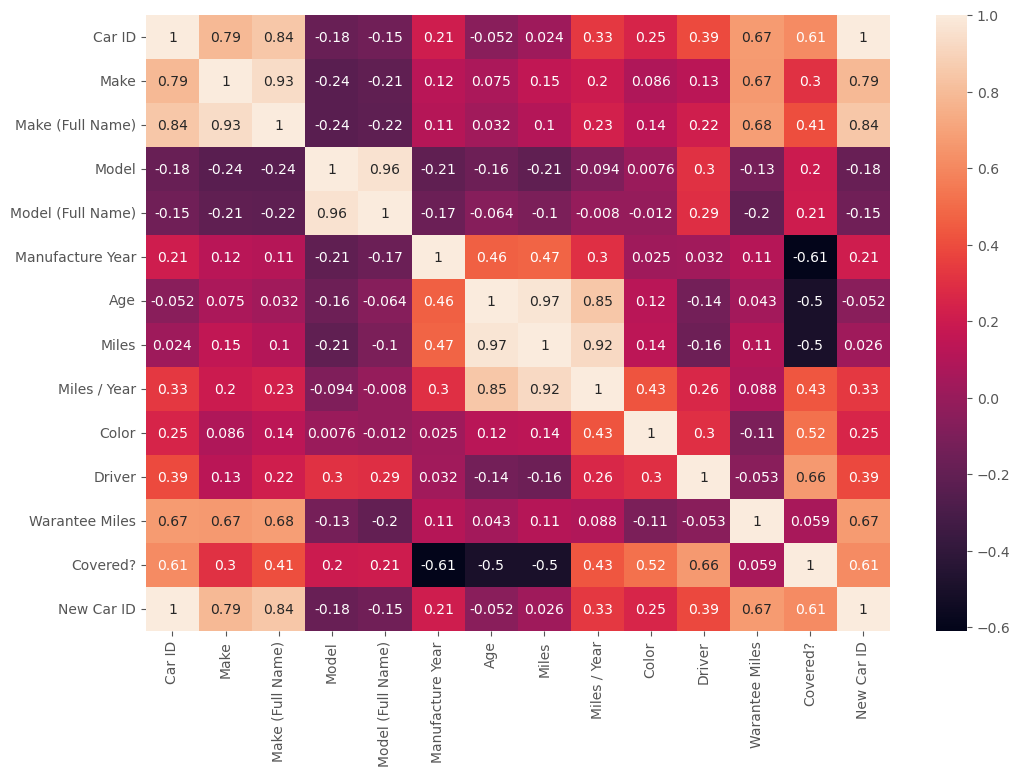

In [33]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Cleaning Data

In [34]:
car = car.truncate(after=51)
car.tail()

,Car ID,Make,Make (Full Name),Model,Model (Full Name),Manufacture Year,Age,Miles,Miles / Year,Color,Driver,Warantee Miles,Covered?,New Car ID
47,49,6,5,4,4,14.0,9.0,17556.3,7,1,9,100000.0,1,49
48,24,2,2,3,0,14.0,9.0,14289.6,3,4,14,100000.0,1,24
49,35,3,3,2,3,13.0,10.0,13867.6,2,0,1,75000.0,1,35
50,19,1,1,6,6,13.0,10.0,13682.9,1,0,10,75000.0,1,18
51,36,3,3,8,8,14.0,9.0,3708.1,0,0,8,100000.0,1,36


In [35]:
change_values = pd.Categorical(car["Covered?"]) # it turns it into a category
change_values = change_values.rename_categories(["Not Covered","Covered"])
change_values.describe()

,counts,freqs
categories,,
Not Covered,4,0.076923
Covered,48,0.923077


In [36]:
car["Covered?"] = change_values
car.head()

,Car ID,Make,Make (Full Name),Model,Model (Full Name),Manufacture Year,Age,Miles,Miles / Year,Color,Driver,Warantee Miles,Covered?,New Car ID
0,50,6,5,0,1,96.0,27.0,114660.6,51,2,1,100000.0,Not Covered,50
1,51,6,5,0,1,98.0,25.0,93382.6,49,0,13,100000.0,Covered,51
2,42,6,5,0,1,0.0,23.0,85928.0,48,2,2,100000.0,Covered,42
3,25,2,2,10,10,98.0,25.0,83162.7,40,0,11,100000.0,Covered,25
4,37,3,3,2,3,99.0,24.0,82374.0,45,4,10,75000.0,Not Covered,37


In [37]:
change_values1 = pd.Categorical(car["Manufacture Year"])
change_values1 = change_values1.rename_categories(["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","1996","1998","1999"])
change_values1.describe()

,counts,freqs
categories,,
2000,3,0.057692
2001,2,0.038462
2002,2,0.038462
2003,1,0.019231
2004,3,0.057692
2005,1,0.019231
2006,4,0.076923
2007,2,0.038462
2008,4,0.076923


In [38]:
car["Manufacture Year"] = change_values1
car.tail()

,Car ID,Make,Make (Full Name),Model,Model (Full Name),Manufacture Year,Age,Miles,Miles / Year,Color,Driver,Warantee Miles,Covered?,New Car ID
47,49,6,5,4,4,2014,9.0,17556.3,7,1,9,100000.0,Covered,49
48,24,2,2,3,0,2014,9.0,14289.6,3,4,14,100000.0,Covered,24
49,35,3,3,2,3,2013,10.0,13867.6,2,0,1,75000.0,Covered,35
50,19,1,1,6,6,2013,10.0,13682.9,1,0,10,75000.0,Covered,18
51,36,3,3,8,8,2014,9.0,3708.1,0,0,8,100000.0,Covered,36


## Graphs

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

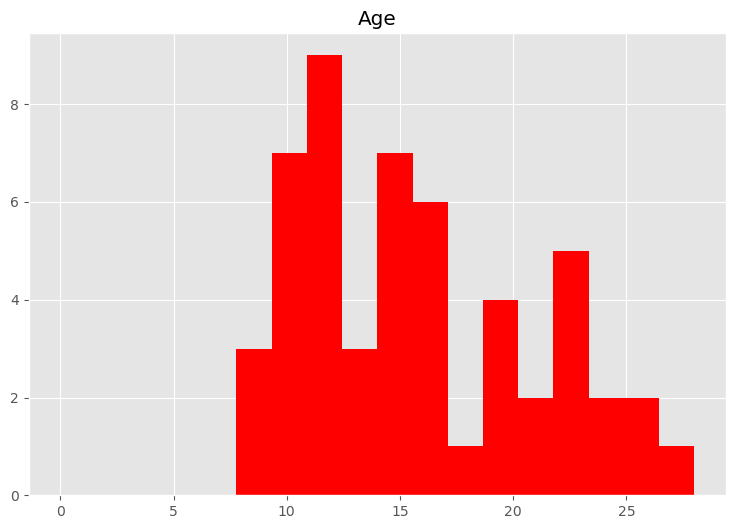

In [39]:
car.hist(column='Age',    # Column to plot
         figsize=(9,6),   # Plot size
         color = 'red', 
         bins =18,        # Number of histogram bins
         range = (0,28))         

<Axes: >

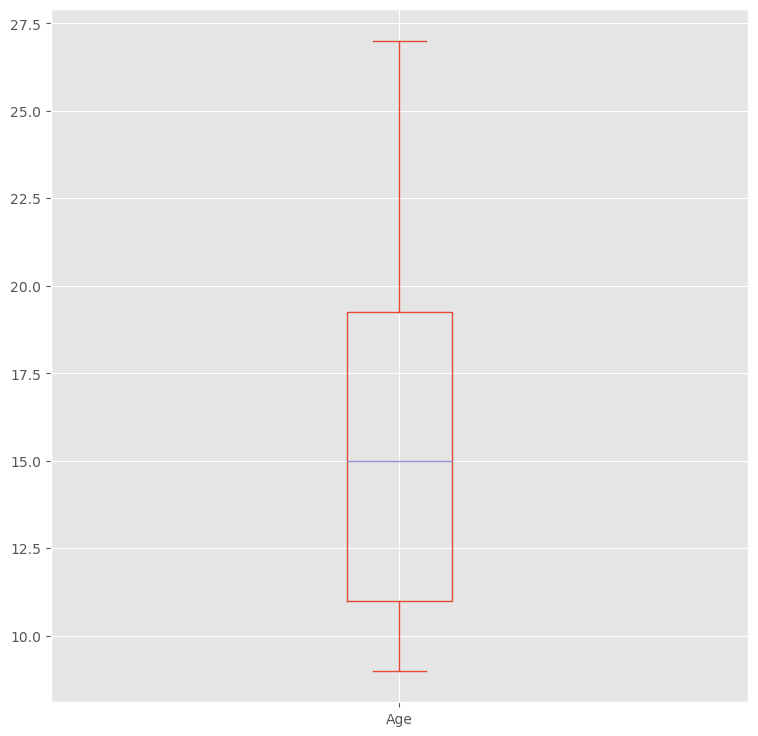

In [41]:
car["Age"].plot(kind="box",figsize=(9,9))

<Axes: >

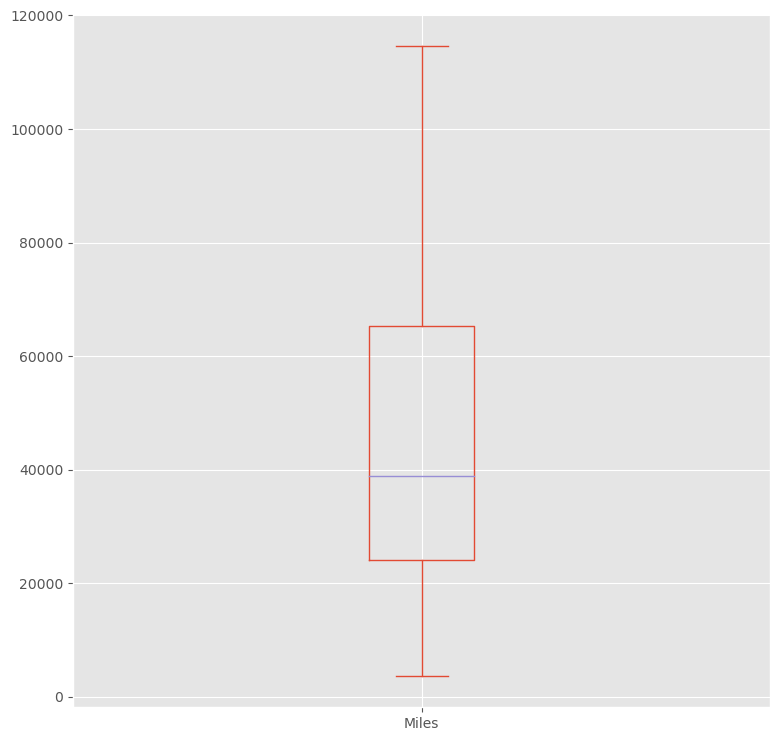

In [42]:
car["Miles"].plot(kind="box",figsize=(9,9))

<Axes: >

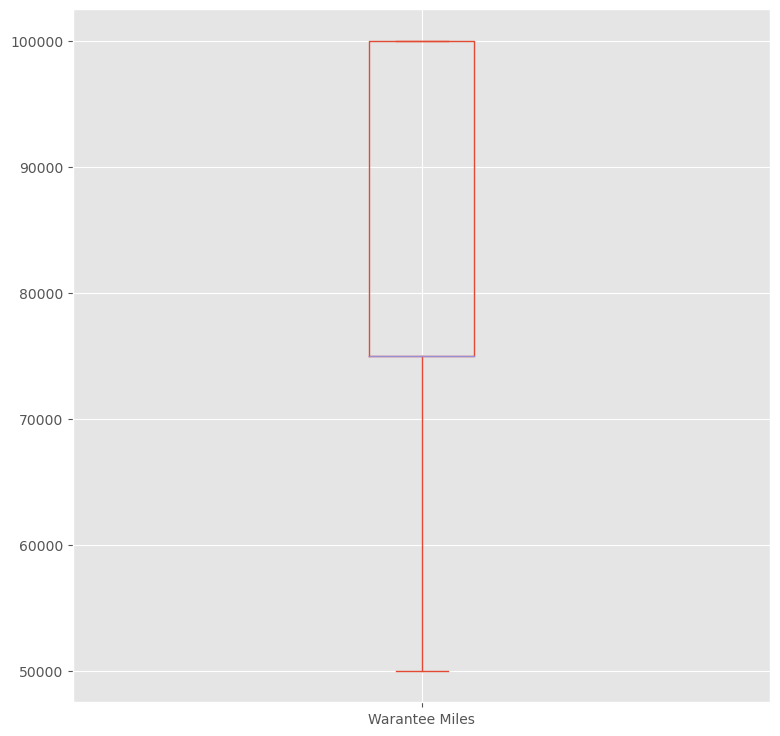

In [43]:
car["Warantee Miles"].plot(kind="box",figsize=(9,9))

In [44]:
models = pd.crosstab(index=car["Model"], columns="count")
models

col_0,count
Model,
0,6
1,4
2,7
3,3
4,4
5,4
6,8
7,5
8,5


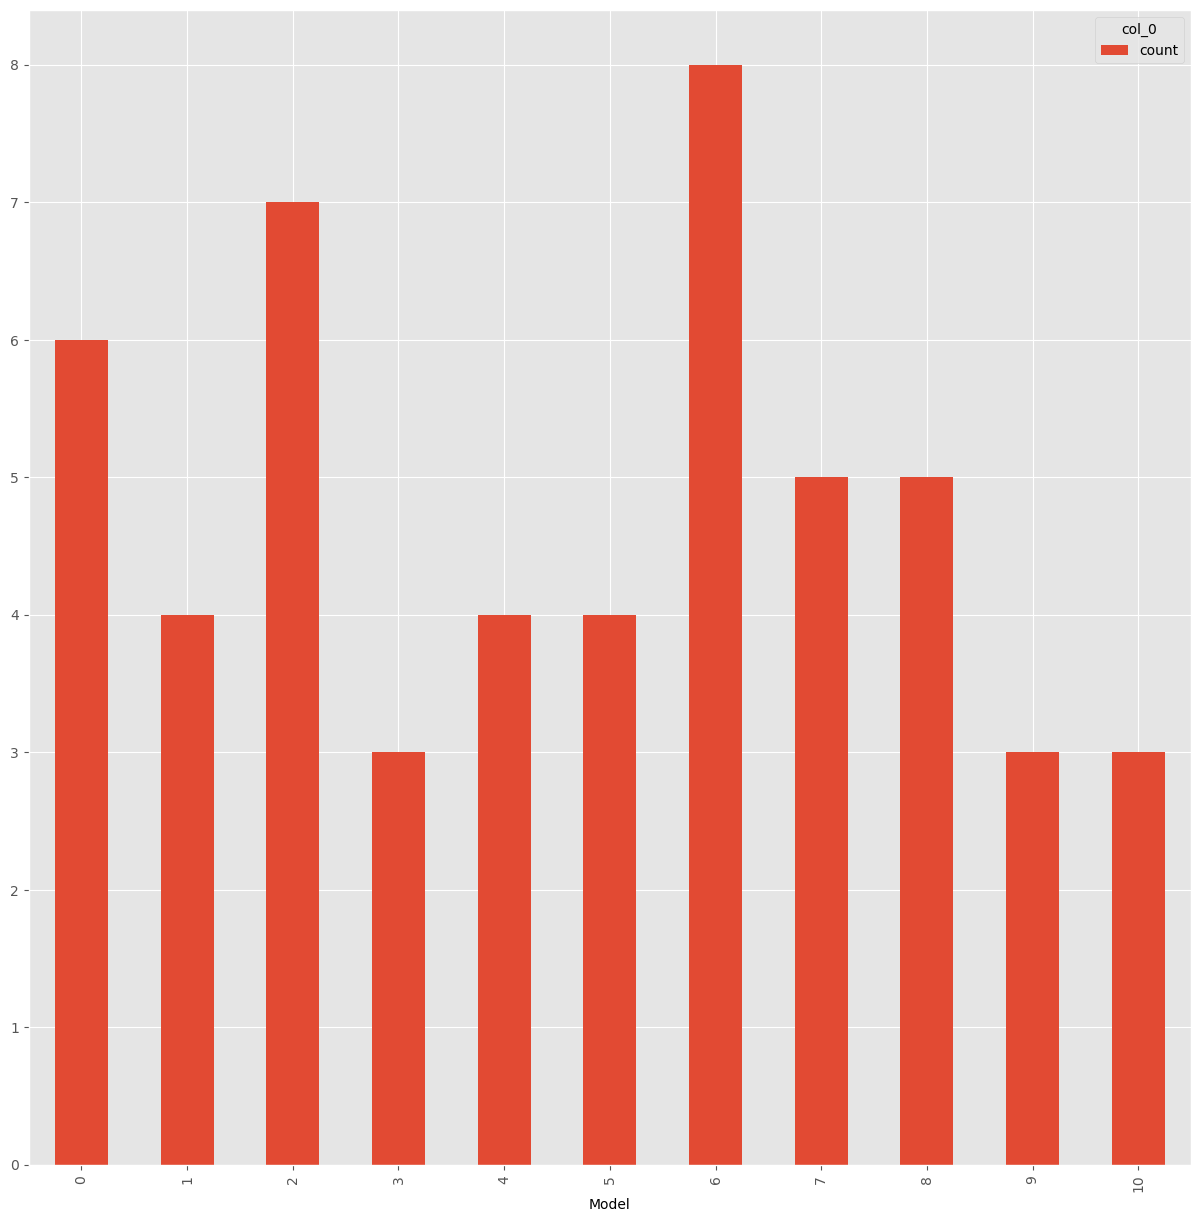

In [45]:
models.plot(kind="bar", figsize=(15,15));

In [46]:
models1 = pd.crosstab(index=car["Model"], columns=car["Color"])
models1

Color,0,1,2,3,4
Model,,,,,
0,2,1,2,0,1
1,1,0,1,1,1
2,4,2,0,0,1
3,1,0,0,0,2
4,2,1,0,1,0
5,2,2,0,0,0
6,4,0,2,0,2
7,2,0,1,0,2
8,3,0,0,0,2


<Axes: xlabel='Model'>

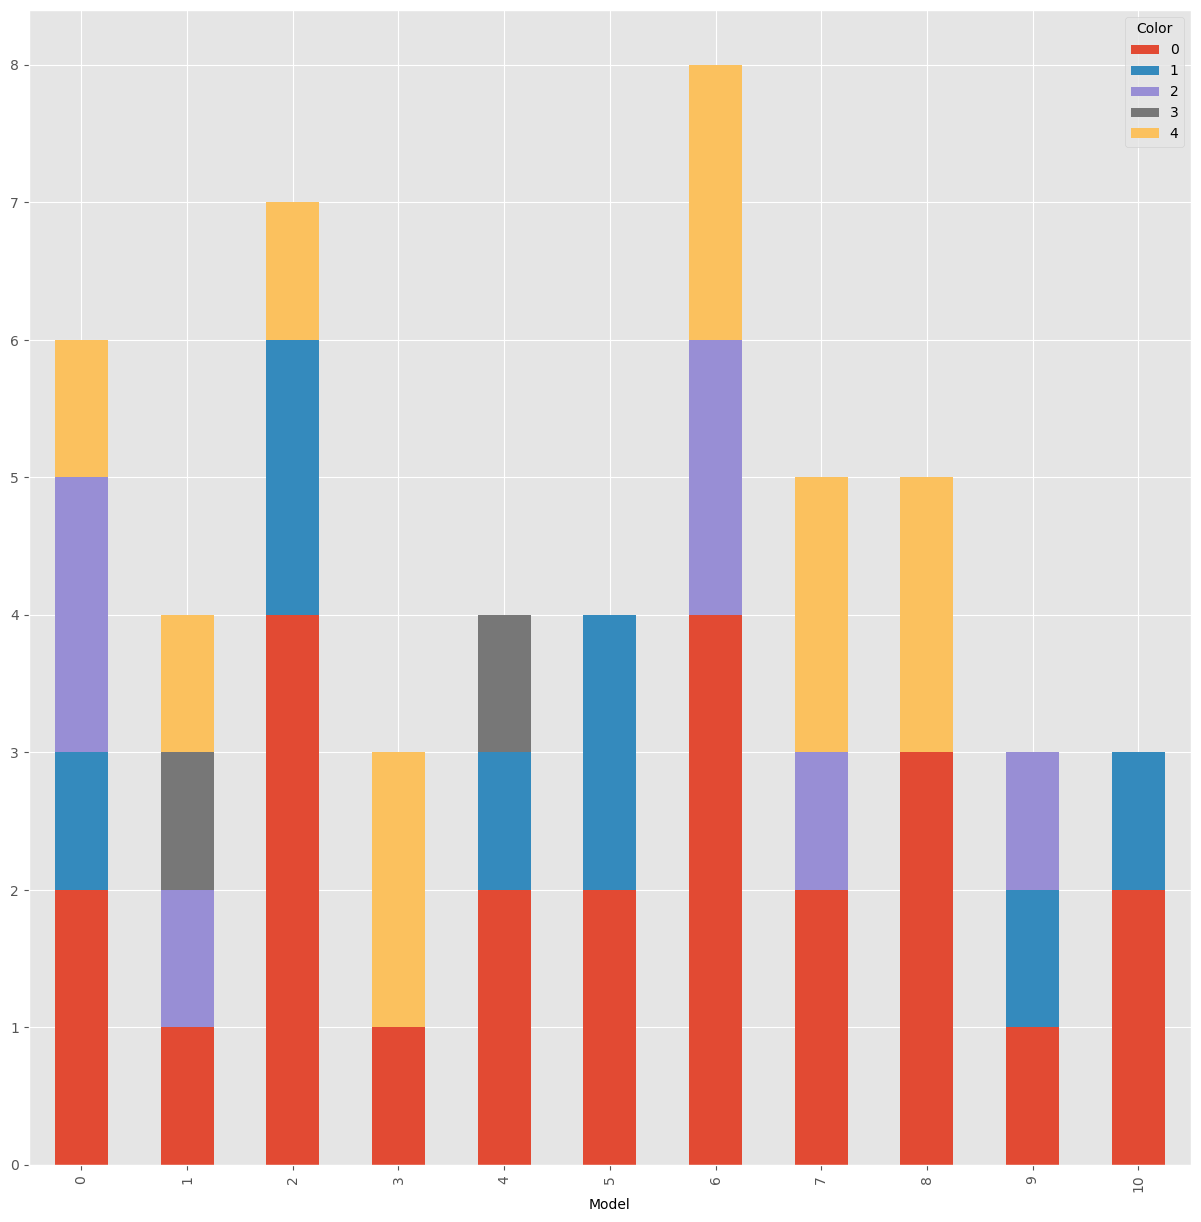

In [47]:
cars_color = models1.plot(kind="bar", figsize=(15,15),stacked=True);
cars_color

In [48]:
my_tab = pd.crosstab(index=car["Manufacture Year"], columns=car["Model"]) #margins=True
my_tab

Model,0,1,2,3,4,5,6,7,8,9,10
Manufacture Year,,,,,,,,,,,
2000,1,1,0,0,0,0,0,0,0,0,1
2001,0,0,1,0,0,0,0,0,1,0,0
2002,1,0,0,0,1,0,0,0,0,0,0
2003,0,0,0,0,1,0,0,0,0,0,0
2004,0,2,0,0,0,0,0,0,0,1,0
2005,0,0,0,0,0,0,0,0,1,0,0
2006,0,0,0,0,0,0,2,2,0,0,0
2007,0,0,0,0,0,0,0,0,1,1,0
2008,0,0,0,0,0,0,0,3,1,0,0


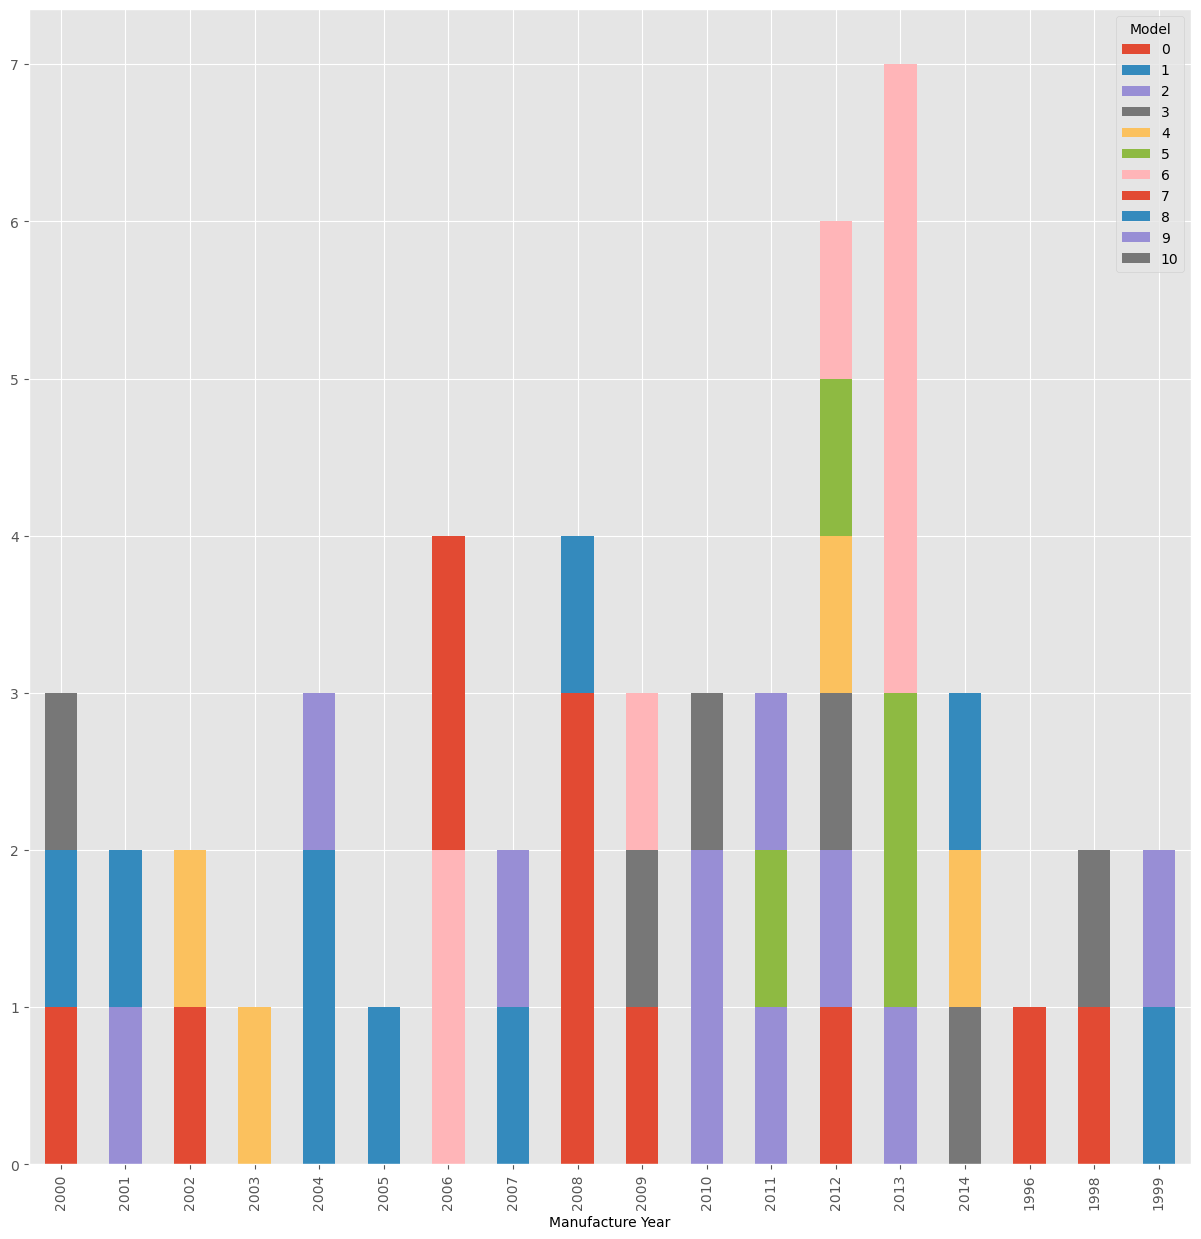

In [49]:
my_tab.plot(kind="bar", figsize=(15,15), stacked=True);

## Linear regression 

<Axes: xlabel='Miles', ylabel='Age'>

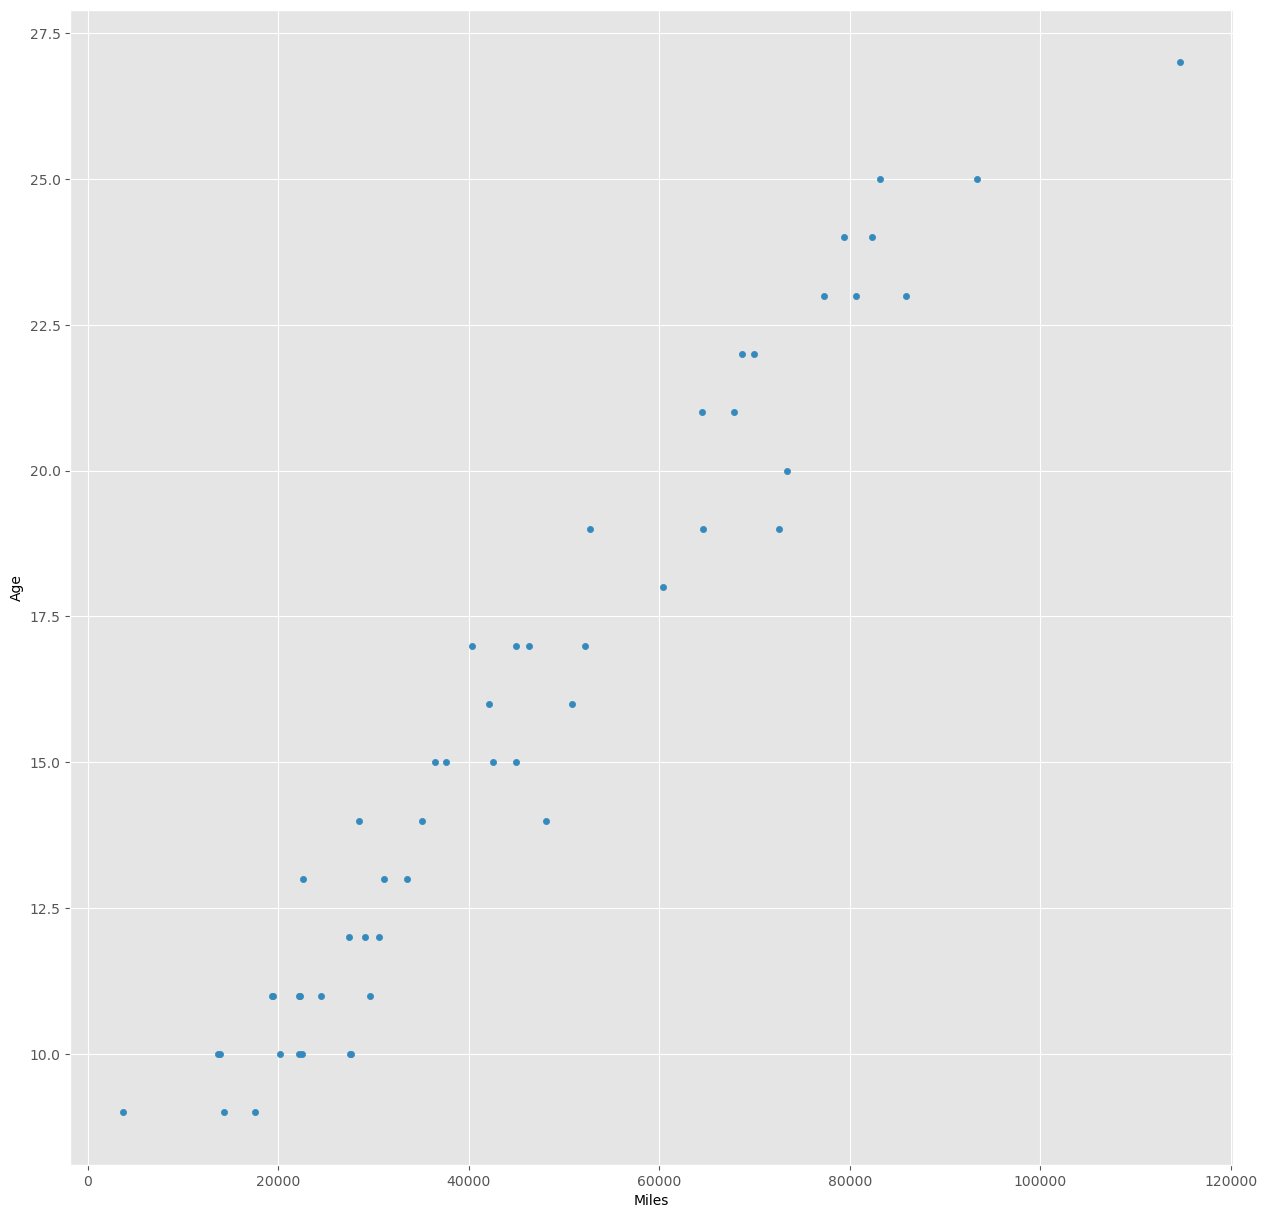

In [50]:
car.plot(kind="scatter",     # Create a scatterplot
              x="Miles",          # Put carat on the x axis
              y="Age",          # Put price on the y axis
              figsize=(15,15))

In [51]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(car["Miles"]), 
                     y = car["Age"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

6.71174800548946
[0.00019948]


In [52]:
regression_model.score(X = pd.DataFrame(car["Miles"]), 
                       y = car["Age"])

0.9437343321364537

In [53]:
train_prediction = regression_model.predict(X = pd.DataFrame(car["Miles"]))

# Actual - prediction = residuals
residuals = car["Age"] - train_prediction

residuals.describe()

count    5.200000e+01
mean    -1.246866e-15
std      1.227364e+00
min     -2.584557e+00
25%     -7.705580e-01
50%     -1.282862e-01
75%      9.262323e-01
max      2.243752e+00
Name: Age, dtype: float64

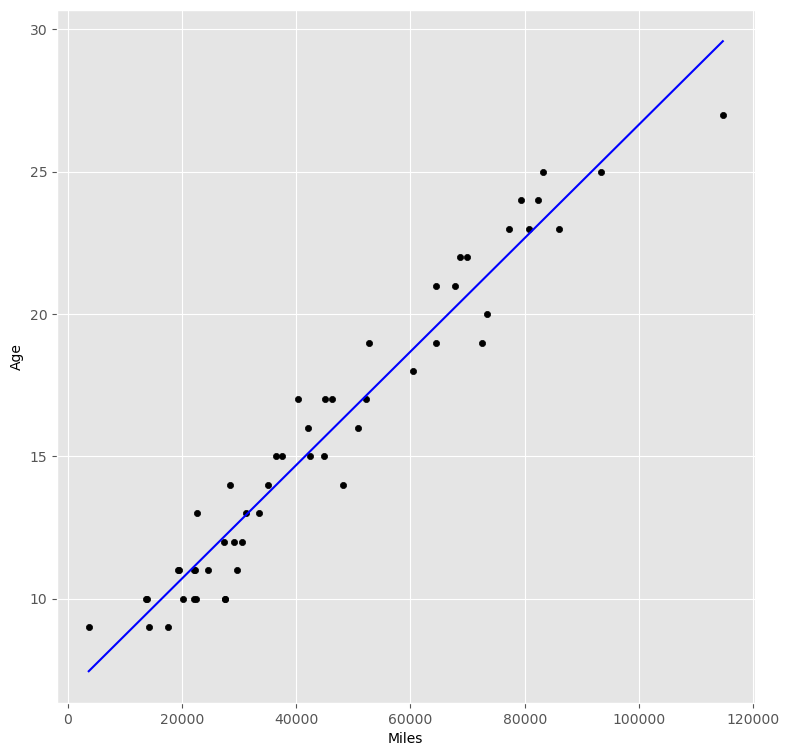

In [54]:
car.plot(kind="scatter",
           x="Miles",
           y="Age",
           figsize=(9,9),
           color="black"
           )

# Plot regression line
plt.plot(car["Miles"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

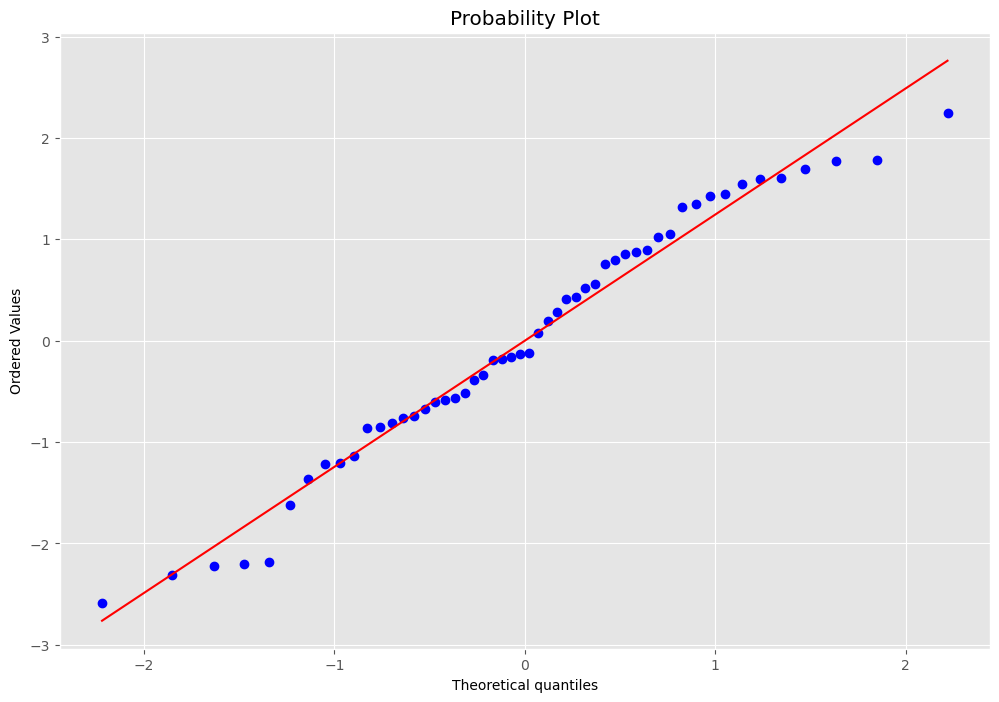

In [55]:
stats.probplot(residuals, dist="norm", plot=plt);

In [56]:
RMSE = mean_squared_error(train_prediction, car["Miles"])**0.5
RMSE

51372.63910024002

## Polinomial regression

In [57]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([car["Miles"],           # Include weight
                           car["Miles"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = car["Age"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
print("Model Accuracy:")
print(poly_model.score(X = predictors, 
                 y = car["Age"]))

Model intercept
5.947982378385971
Model Coefficients
[ 2.37630110e-04 -3.59709764e-10]
Model Accuracy:
0.9459748448913851


C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


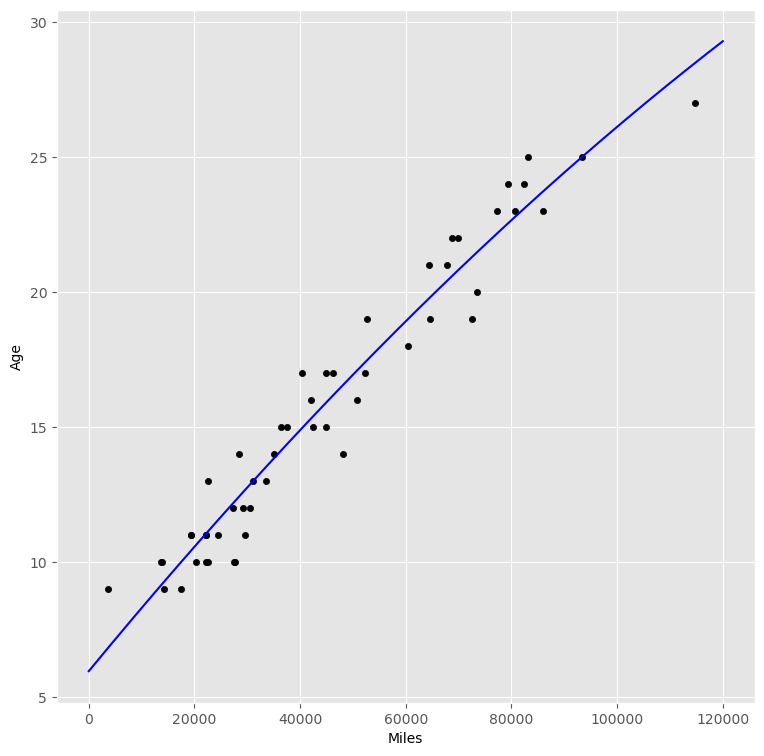

In [58]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 120000, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

car.plot(kind="scatter",
           x="Miles",
           y="Age",
           figsize=(9,9),
           color="black")

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

## Logistic regression for binary variables

In [59]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert variable to numeric
encoded_covered = label_encoder.fit_transform(car["Covered?"])

# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver = 'lbfgs')

# Train the model
log_model.fit(X = pd.DataFrame(encoded_covered), 
              y = car["Color"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[ 1.15162557  0.0567495  -0.20317542 -1.34685619  0.34165654]
[[-0.3549063 ]
 [-0.42333865]
 [ 0.84242564]
 [-0.13833278]
 [ 0.07415209]]


## Decision tree

In [60]:
car['Age'] = pd.Categorical(car['Age'])

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert variable to numeric
encoded_covered = label_encoder.fit_transform(car["Covered?"])
encoded_age = label_encoder.fit_transform(car["Color"])

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame([encoded_covered,encoded_age]).T, 
               y = car["Model"])

DecisionTreeClassifier()

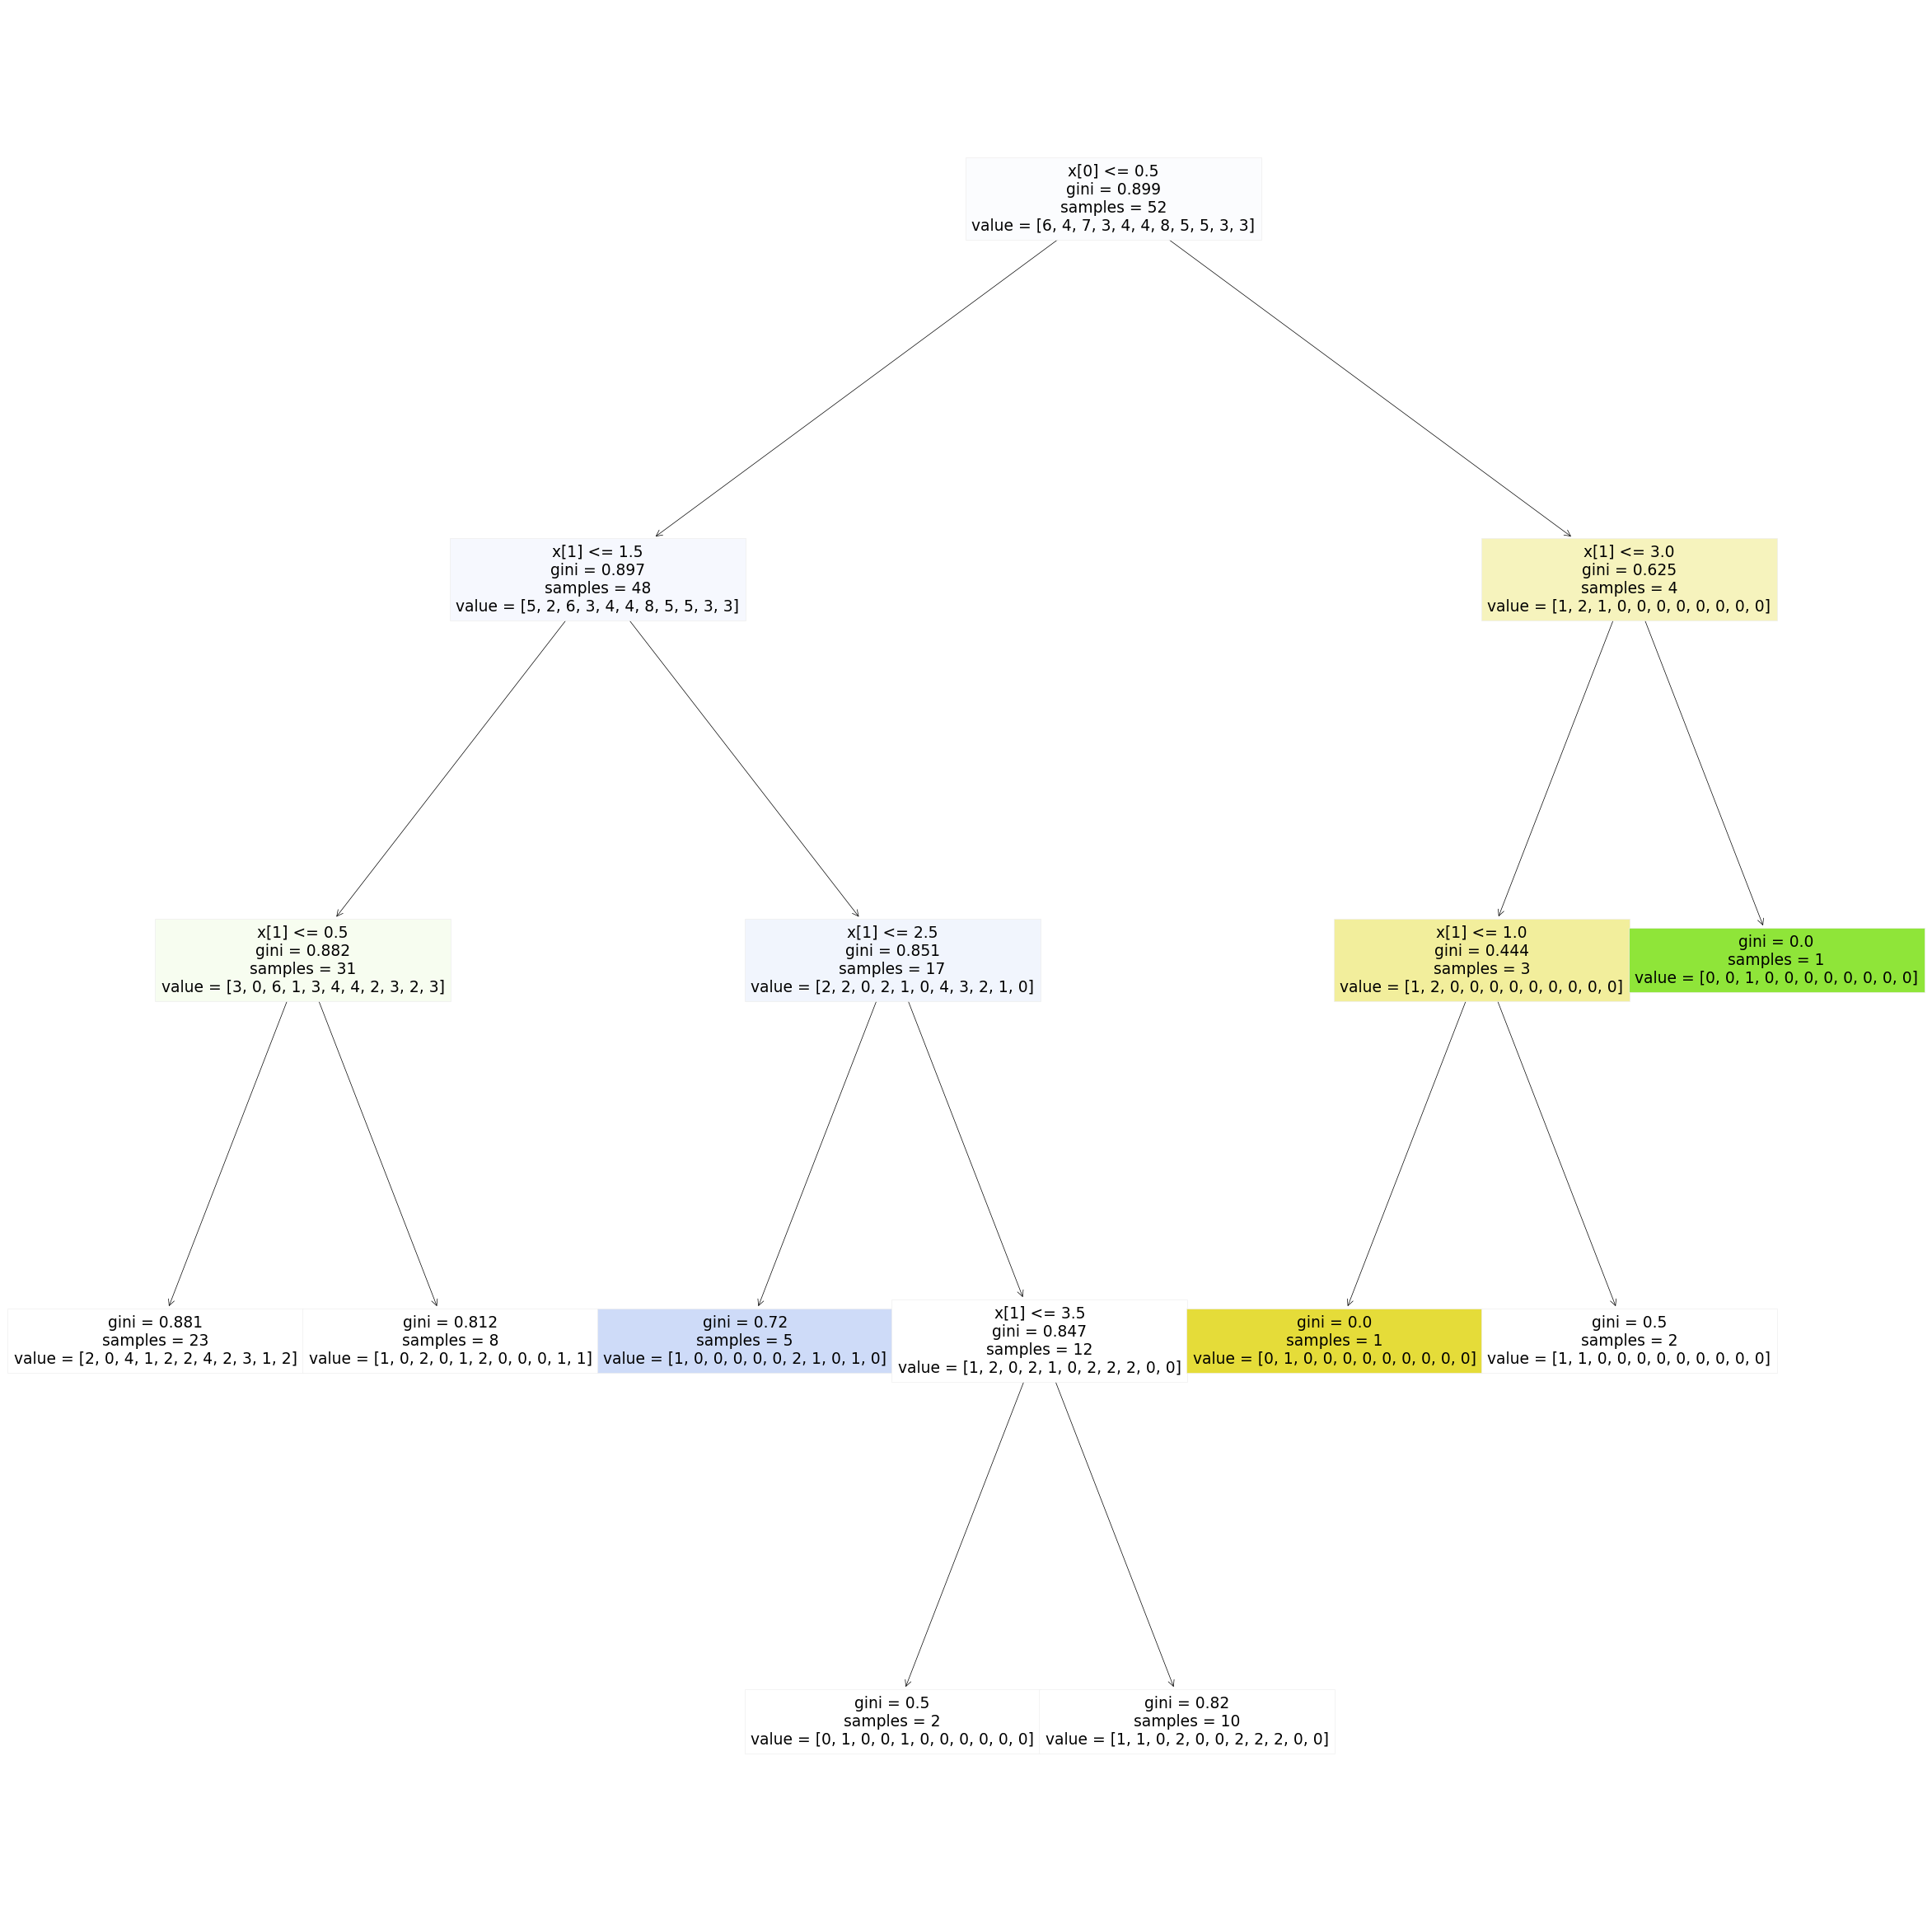

In [61]:
# Save tree as dot file
fig =plt.figure(figsize=(30,30))
plot = tree.plot_tree(tree_model , filled=True)

In [62]:
predictors = pd.DataFrame([encoded_covered,encoded_age]).T
# Get probability
preds = tree_model.predict_proba(X = predictors)

# Create a table of predictions
pd.crosstab(preds[:,0], columns = [car["Covered?"], 
                                   car["Color"]])

Covered? Not Covered       Covered             
Color              0  2  4       0  1  2  3   4
row_0                                          
0.000000           1  0  1       0  0  0  2   0
0.086957           0  0  0      23  0  0  0   0
0.100000           0  0  0       0  0  0  0  10
0.125000           0  0  0       0  8  0  0   0
0.200000           0  0  0       0  0  5  0   0
0.500000           0  2  0       0  0  0  0   0